In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/super-store/SampleSuperstore.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings


In [3]:
df=pd.read_csv('/kaggle/input/super-store/SampleSuperstore.csv')

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df['profit']=df['Profit'].map(lambda x: 'P' if x>0 else 'L')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,P
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,P
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,P
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,L
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,P


In [6]:
df.drop('Profit',axis=1,inplace=True)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,P
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,P
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,P
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,L
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,P


In [7]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'profit'],
      dtype='object')

In [8]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
profit           object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  profit        9994 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1015.1+ KB


# Target Variabl

In [10]:
df['profit'].value_counts()

profit
P    8058
L    1936
Name: count, dtype: int64

In [11]:
df['profit'].value_counts(normalize=True)

profit
P    0.806284
L    0.193716
Name: proportion, dtype: float64

In [12]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,P
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,P
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,P
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,L
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,P
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,P
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,P
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,P


<Axes: xlabel='profit'>

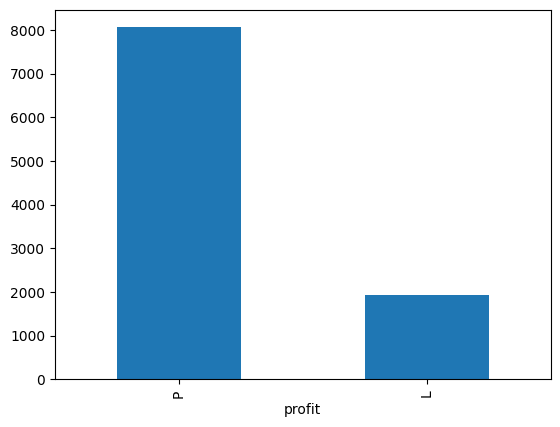

In [13]:
df['profit'].value_counts().plot.bar()

**in given data have 800 times of profit behind 994 sales.**

# Indipendent varibles(Categorical)

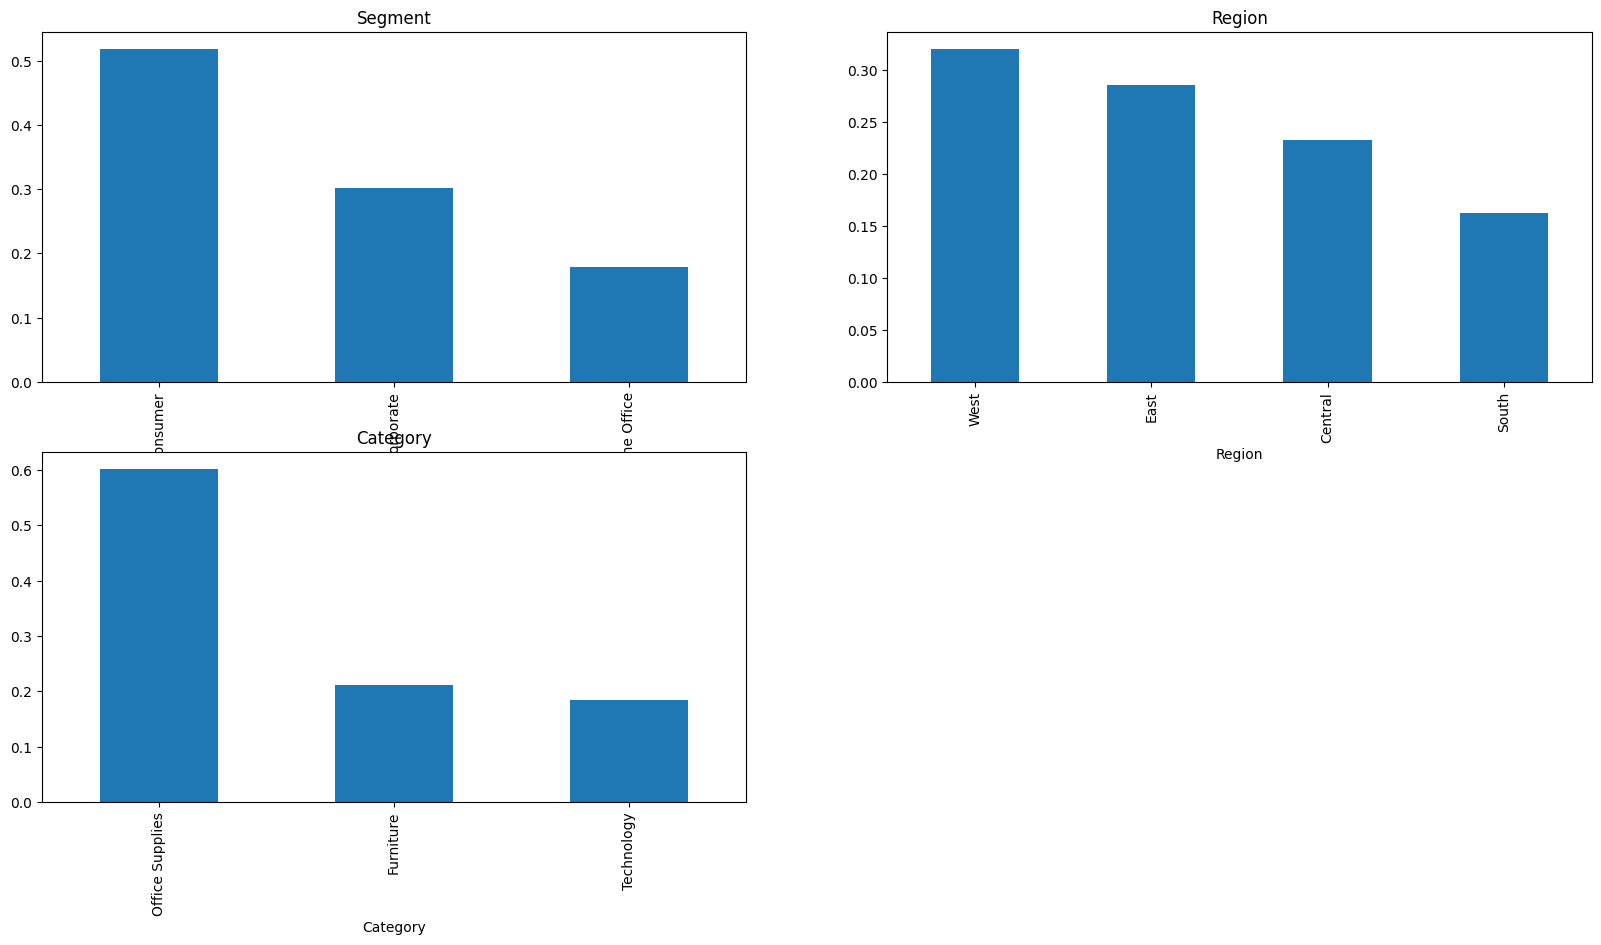

In [14]:
plt.figure(1)


plt.subplot(221)
df['Segment'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Segment')

plt.subplot(222) 
df['Region'].value_counts(normalize=True).plot.bar(title= 'Region') 


plt.subplot(223) 
df['Category'].value_counts(normalize=True).plot.bar(title= 'Category') 


plt.show()

**50% of buyers are Consumer Segment**

**The west resion shows the high sales of 35%**

**Office Supplies account for 60% sales.**


# Independent Variable (Ordinal) 

<Axes: title={'center': 'Ship_mode'}, xlabel='Ship Mode'>

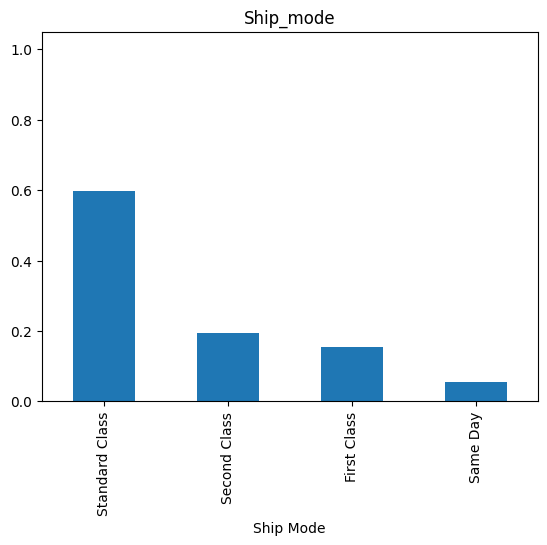

In [15]:
plt.plot(1)
df['Ship Mode'].value_counts(normalize=True).plot.bar(title= 'Ship_mode') 


**Standard Class accounts for 60% shipments.**

# Independent Variable (Numerical)¶


/tmp/ipykernel_24/3214254043.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales']);
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


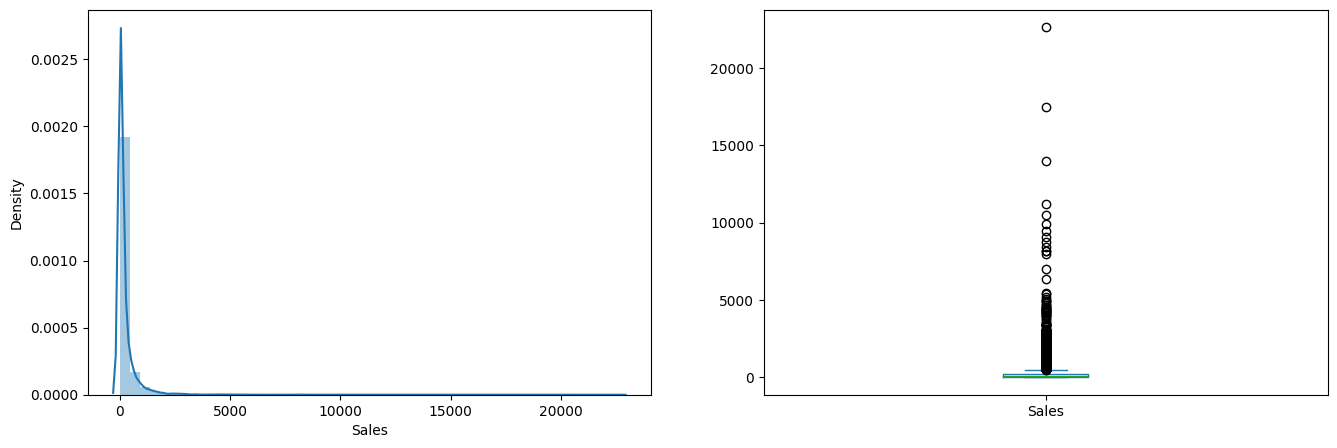

In [16]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df['Sales']); 
plt.subplot(122) 
df['Sales'].plot.box(figsize=(16,5)) 
plt.show()

**Sales data contains several outliers, indicating significant variability or extreme values in transactions**

Text(0.5, 0.98, '')

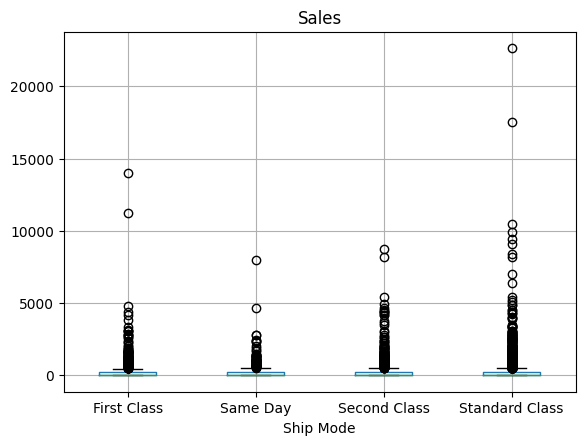

In [17]:
df.boxplot(column='Sales', by = 'Ship Mode') 
plt.suptitle("")

/tmp/ipykernel_24/4154414302.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Discount']);
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


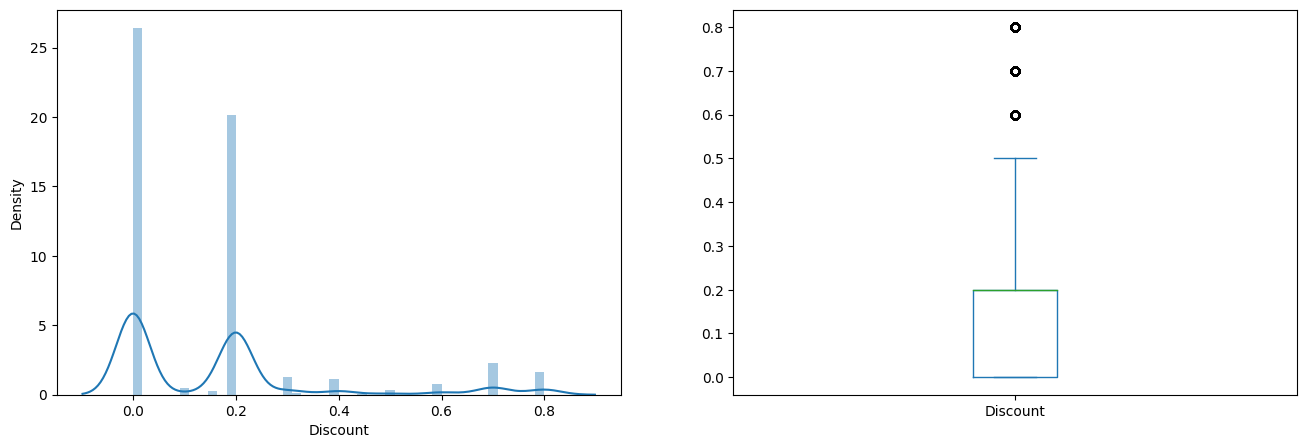

In [18]:
plt.figure(1) 
plt.subplot(121) 
df=df.dropna() 
sns.distplot(df['Discount']); 
plt.subplot(122) 
df['Discount'].plot.box(figsize=(16,5)) 
plt.show()

/tmp/ipykernel_24/2157579683.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quantity']);
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


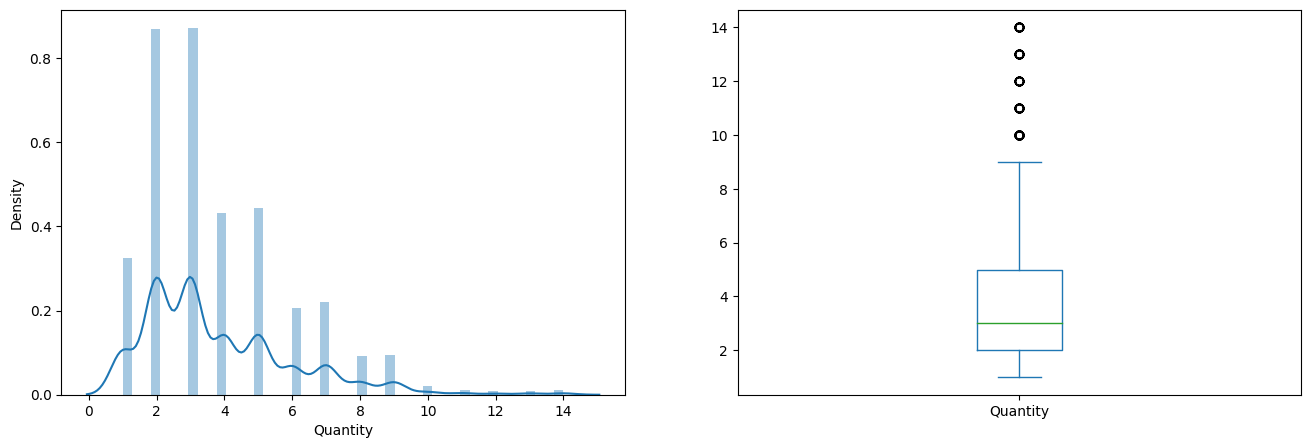

In [19]:
plt.figure(1) 
plt.subplot(121) 
df=df.dropna() 
sns.distplot(df['Quantity']); 
plt.subplot(122) 
df['Quantity'].plot.box(figsize=(16,5)) 
plt.show()

# Categorical Independent Variable v/s Target Variable

<Axes: xlabel='Segment'>

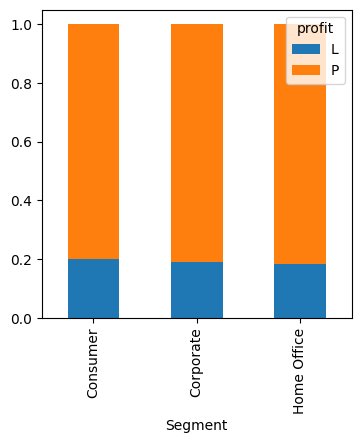

In [20]:
Segment=pd.crosstab(df['Segment'],df['profit'])
Segment.div(Segment.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

**In the Segment analysis, all segments show 20% loss and 80% profit.**

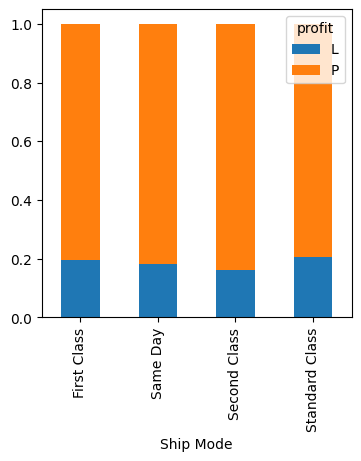

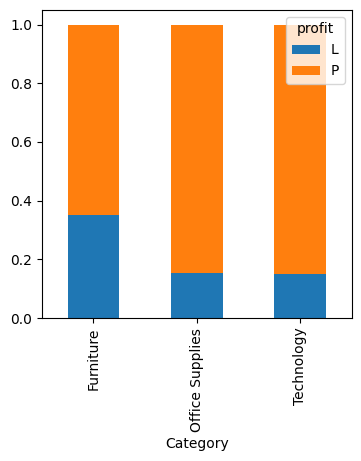

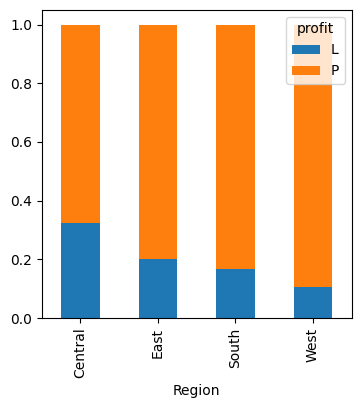

In [21]:
Ship_Mode=pd.crosstab(df['Ship Mode'],df['profit']) 
Category=pd.crosstab(df['Category'],df['profit']) 
Region=pd.crosstab(df['Region'],df['profit']) 

Ship_Mode.div(Ship_Mode.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Category.div(Category.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Region.div(Region.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 



**In Ship Mode, only Second Class has less loss compared to other shipping methods.**

**Furniture has the highest loss of 3.5 and profit of 6.5, while Technology shows 15% loss and 85% profit.**

**The Central region has the highest loss (35%) and profit (65%), while the West region shows 10% loss and 900% profit.**









# Numerical Independent Variable vs Target Variable¶


<Axes: xlabel='profit'>

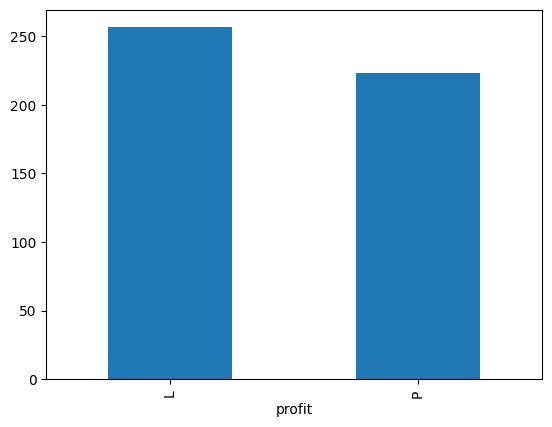

In [22]:
df.groupby('profit')['Sales'].mean().plot.bar()

**the chart shows that average sales for profit 225,compare to loss are higher at 250**

<Axes: xlabel='profit'>

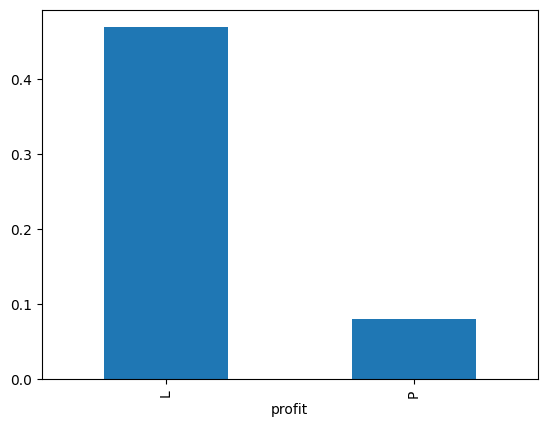

In [23]:
df.groupby('profit')['Discount'].mean().plot.bar()

**loss showing higher average discount of 4.5, while profits have a lower average discount of 1.5**

# Missing value imputation¶


In [24]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
profit          0
dtype: int64

**there is no missing values in dataset**

# Outlier Treatment¶


<Axes: >

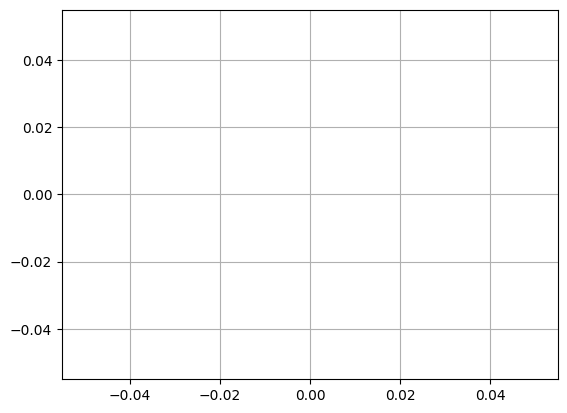

In [25]:
df['Sales_log']=np.log(df['Sales'])
df['Sales_log'].hist(bins=[10])


# Evaluation Metric¶


In [26]:
df=df.drop('Sales',axis=1)

In [27]:
# selecting column only have object datatypes
obj_col=df.select_dtypes(include='object').columns
obj_col

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'profit'],
      dtype='object')

In [28]:
#converting categorical data into numerical form
from sklearn.preprocessing import LabelEncoder

for col in obj_col:
  lb=LabelEncoder()
  df[col]=lb.fit_transform(df[col])

In [29]:
# extracting indipendent and dependent feature
x=df.drop('profit',axis=1)
y=df.iloc[:,-2]

In [30]:
x.head(),y.head()

(   Ship Mode  Segment  Country  City  State  Postal Code  Region  Category  \
 0          2        0        0   194     15        42420       2         0   
 1          2        0        0   194     15        42420       2         0   
 2          2        1        0   266      3        90036       3         1   
 3          3        0        0   153      8        33311       2         0   
 4          3        0        0   153      8        33311       2         1   
 
    Sub-Category  Quantity  Discount  Sales_log  
 0             4         2      0.00   5.568192  
 1             5         3      0.00   6.595699  
 2            10         2      0.00   2.682390  
 3            16         5      0.45   6.864407  
 4            14         2      0.20   3.107631  ,
 0    1
 1    1
 2    1
 3    0
 4    1
 Name: profit, dtype: int64)

In [31]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
x_train.shape,x_test.shape

((7995, 12), (1999, 12))

In [33]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [34]:
y_pred=model.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8044022011005503

In [36]:
#using knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean')

In [37]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [38]:
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.8569284642321161

In [39]:
from sklearn.model_selection import StratifiedKFold

In [40]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    y_pred = model.predict(xvl)     
    score = accuracy_score(yvl,y_pred)     
    print('accuracy_score',score)     
    i+=1


1 of kfold 5
accuracy_score 0.8054027013506754

2 of kfold 5
accuracy_score 0.8064032016008004

3 of kfold 5
accuracy_score 0.8064032016008004

4 of kfold 5
accuracy_score 0.8029014507253627

5 of kfold 5
accuracy_score 0.8033033033033034


In [41]:
pred=model.predict_proba(xvl)[:,1]


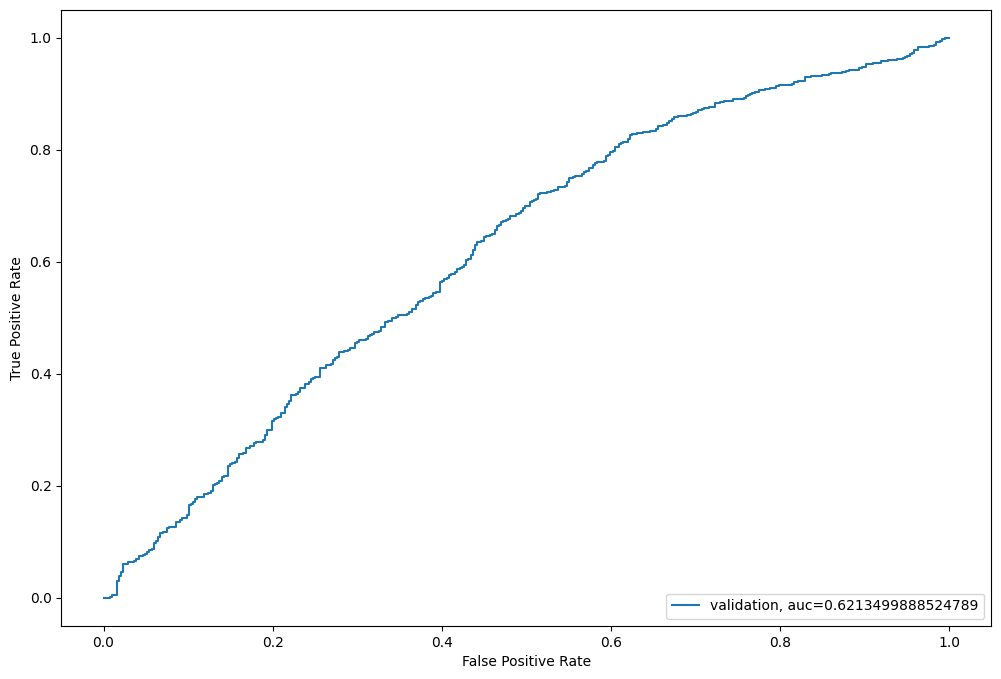

In [42]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred)

plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

# Logistic Regression

In [43]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         

    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1
    

pred=model.predict_proba(xvl)[:,1]
print((score).mean())


1 of kfold 5
accuracy_score 0.8054027013506754

2 of kfold 5
accuracy_score 0.8064032016008004

3 of kfold 5
accuracy_score 0.8064032016008004

4 of kfold 5
accuracy_score 0.8029014507253627

5 of kfold 5
accuracy_score 0.8033033033033034
0.8033033033033034


# Decision Tree

In [44]:
from sklearn import tree

In [45]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1
    
print(score.mean())


1 of kfold 5
accuracy_score 0.9294647323661831

2 of kfold 5
accuracy_score 0.9289644822411206

3 of kfold 5
accuracy_score 0.9239619809904952

4 of kfold 5
accuracy_score 0.9314657328664332

5 of kfold 5
accuracy_score 0.9254254254254254
0.9254254254254254


# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
print(score.mean())


1 of kfold 5
accuracy_score 0.9459729864932466

2 of kfold 5
accuracy_score 0.9404702351175588

3 of kfold 5
accuracy_score 0.9444722361180591

4 of kfold 5
accuracy_score 0.9479739869934968

5 of kfold 5
accuracy_score 0.9394394394394394
0.9394394394394394


# 

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [50]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)


In [51]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(x,y,test_size=0.3,random_state=0
                                          )

In [ ]:
grid_search.fit(x_train,y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=11, n_estimators=81)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
print(score.mean())

# XGBOOST

In [ ]:
from xgboost import XGBClassifier


In [ ]:
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = XGBClassifier(n_estimators=50, max_depth=4)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1

print(score.mean())


**XGboost and Random Forest performing well with 0.945 accuracy score.**